In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [133]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [134]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


### conso.csv créé par pi4 node-red onglet Linky

In [135]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706534 entries, 0 to 1706533
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Interval  int64  
 1   kWh       float64
dtypes: float64(1), int64(1)
memory usage: 26.0 MB


In [136]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1706529    0.12
1706530    0.13
1706531    0.12
1706532    0.13
1706533    0.12
Name: kWh, Length: 1706534, dtype: float64

In [137]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1706529    0.12
1706530    0.13
1706531    0.12
1706532    0.13
1706533    0.12
Name: kWh, Length: 1706534, dtype: float64

In [138]:
l=len(conso_data)-1
l

1706533

In [139]:
conso_data['sec']=conso_data['Interval']/1000


In [140]:
conso_data['Wh']=3600000/conso_data['Interval']


In [141]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [142]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706534 entries, 0 to 1706533
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Interval   int64  
 1   kWh        float64
 2   sec        float64
 3   Wh         float64
 4   cumul(ms)  int64  
dtypes: float64(3), int64(2)
memory usage: 65.1 MB


In [143]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1706529,28609,0.12,28.609,125.834528,42129772059
1706530,28542,0.13,28.542,126.129914,42129800601
1706531,28641,0.12,28.641,125.693935,42129829242
1706532,28559,0.13,28.559,126.054834,42129857801
1706533,28669,0.12,28.669,125.571174,42129886470


In [144]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

42129886470000

In [145]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 20, 0, 29, 234400)

In [146]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [147]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [17]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [ ]:
conso_data['dates']

0         2023-08-21 20:00:43.492646
1         2023-08-21 20:01:05.350646
2         2023-08-21 20:01:27.351646
3         2023-08-21 20:01:49.279646
4         2023-08-21 20:02:11.170646
                     ...            
1706518   2024-12-21 10:38:09.197646
1706519   2024-12-21 10:38:36.628646
1706520   2024-12-21 10:39:03.474646
1706521   2024-12-21 10:39:30.680646
1706522   2024-12-21 10:39:58.031646
Name: dates, Length: 1706523, dtype: datetime64[ns]

## créer les dates

In [ ]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:00:43.492646,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:01:05.350646,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:01:27.351646,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:01:49.279646,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:02:11.170646,21/08/23
...,...,...,...,...,...,...,...
1706518,29699,0.12,29.699,121.216203,42129467639,2024-12-21 10:38:09.197646,21/12/24
1706519,27431,0.13,27.431,131.238380,42129495070,2024-12-21 10:38:36.628646,21/12/24
1706520,26846,0.13,26.846,134.098190,42129521916,2024-12-21 10:39:03.474646,21/12/24
1706521,27206,0.13,27.206,132.323752,42129549122,2024-12-21 10:39:30.680646,21/12/24


### save conso_data with dates

In [20]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [21]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('21/12/24', 21, 12, 2024)

In [22]:
here = now.strftime('%H:%M:%S')
here

'10:40:30'

In [23]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [24]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 1705202 to 1706522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1321 non-null   int64         
 1   kWh        1321 non-null   float64       
 2   sec        1321 non-null   float64       
 3   Wh         1321 non-null   float64       
 4   cumul(ms)  1321 non-null   int64         
 5   dates      1321 non-null   datetime64[ns]
 6   days       1321 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 82.6+ KB


In [25]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [26]:
data = list(df_grp['kWh'])
print(data)

[0.714, 3.701, 4.235, 3.684, 4.125, 4.565, 3.604, 3.432, 3.514, 3.692, 3.635, 3.934, 4.25, 3.645, 3.63, 3.632, 3.321, 3.383, 4.216, 4.01, 4.046, 3.969, 3.47, 4.376, 3.826, 3.756, 4.195, 4.731, 3.929, 3.222, 3.176, 3.904, 3.77, 3.117, 3.777, 4.159, 3.687, 3.665, 4.701, 4.249, 4.479, 3.814, 3.433, 4.305, 3.874, 3.826, 3.472, 4.062, 3.678, 3.402, 4.159, 3.378, 3.862, 3.841, 3.638, 3.751, 4.269, 3.281, 3.887, 3.044, 2.055, 2.041, 2.398, 4.084, 3.68, 4.347, 3.592, 3.953, 3.751, 3.828, 4.09, 4.069, 3.694, 3.133, 3.782, 3.553, 3.608, 3.667, 3.683, 3.301, 3.842, 3.261, 3.746, 3.657, 4.071, 3.564, 3.42, 3.728, 4.121, 4.335, 3.936, 4.189, 4.236, 3.771, 3.918, 3.833, 3.927, 3.707, 4.026, 4.402, 3.883, 3.506, 3.682, 3.675, 3.346, 3.844, 3.996, 4.102, 3.497, 4.165, 3.598, 3.98, 4.616, 3.645, 3.495, 3.567, 4.079, 3.777, 4.083, 3.987, 3.749, 3.597, 5.106, 3.727, 3.762, 4.233, 4.14, 4.587, 4.461, 4.053, 3.691, 4.358, 4.735, 4.133, 4.81, 4.368, 3.684, 4.186, 3.732, 3.696, 3.53, 3.909, 3.693, 3.709, 3.6

In [27]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [28]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [29]:
df = conso_data
len(df)

1706523

In [30]:
period(p=2)

2023-08-22 02:06:57.295646	2023-08-22 09:11:12.915646	7h 4m 15s 	2000


In [ ]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.293698
dtype: float64

In [ ]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.489822
dtype: float64

In [33]:
last=df_grp.iloc[-1]['kWh']
last

1.321

In [ ]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 1705202 to 1706522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1321 non-null   int64         
 1   kWh        1321 non-null   float64       
 2   sec        1321 non-null   float64       
 3   Wh         1321 non-null   float64       
 4   cumul(ms)  1321 non-null   int64         
 5   dates      1321 non-null   datetime64[ns]
 6   days       1321 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 82.6+ KB


In [35]:
# select day
day = today
#day = '16/08/24'


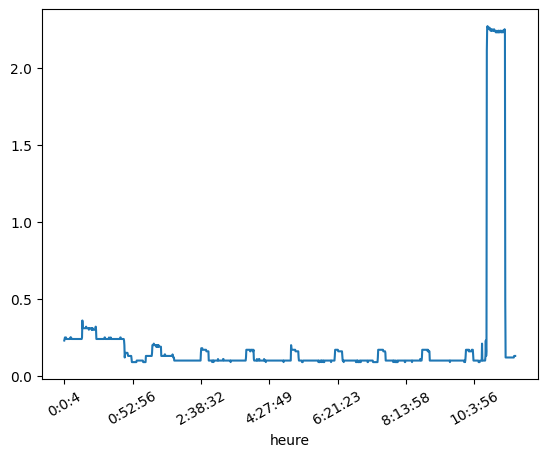

In [ ]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [37]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:00:43.492646,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:01:05.350646,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:01:27.351646,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:01:49.279646,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:02:11.170646,21/08/23
...,...,...,...,...,...,...,...
1706518,29699,0.12,29.699,121.216203,42129467639,2024-12-21 10:38:09.197646,21/12/24
1706519,27431,0.13,27.431,131.238380,42129495070,2024-12-21 10:38:36.628646,21/12/24
1706520,26846,0.13,26.846,134.098190,42129521916,2024-12-21 10:39:03.474646,21/12/24
1706521,27206,0.13,27.206,132.323752,42129549122,2024-12-21 10:39:30.680646,21/12/24


In [38]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:4,15267,0.23,15.267,235.802712,42091182975,2024-12-21 00:00:04.533646,21/12/24
0:0:19,14950,0.24,14.950,240.802676,42091197925,2024-12-21 00:00:19.483646,21/12/24
0:0:33,14180,0.25,14.180,253.878702,42091212105,2024-12-21 00:00:33.663646,21/12/24
0:0:48,14511,0.25,14.511,248.087658,42091226616,2024-12-21 00:00:48.174646,21/12/24
0:1:2,14585,0.25,14.585,246.828934,42091241201,2024-12-21 00:01:02.759646,21/12/24
...,...,...,...,...,...,...,...
10:38:9,29699,0.12,29.699,121.216203,42129467639,2024-12-21 10:38:09.197646,21/12/24
10:38:36,27431,0.13,27.431,131.238380,42129495070,2024-12-21 10:38:36.628646,21/12/24
10:39:3,26846,0.13,26.846,134.098190,42129521916,2024-12-21 10:39:03.474646,21/12/24


In [39]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 14/12/24 4.447
Min : 03/12/24 3.116


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1705202,15267,0.23,15.267,235.802712,42091182975,2024-12-21 00:00:04.533646,21/12/24,0:0:4
1705203,14950,0.24,14.950,240.802676,42091197925,2024-12-21 00:00:19.483646,21/12/24,0:0:19
1705204,14180,0.25,14.180,253.878702,42091212105,2024-12-21 00:00:33.663646,21/12/24,0:0:33
1705205,14511,0.25,14.511,248.087658,42091226616,2024-12-21 00:00:48.174646,21/12/24,0:0:48
1705206,14585,0.25,14.585,246.828934,42091241201,2024-12-21 00:01:02.759646,21/12/24,0:1:2
...,...,...,...,...,...,...,...,...
1706518,29699,0.12,29.699,121.216203,42129467639,2024-12-21 10:38:09.197646,21/12/24,10:38:9
1706519,27431,0.13,27.431,131.238380,42129495070,2024-12-21 10:38:36.628646,21/12/24,10:38:36
1706520,26846,0.13,26.846,134.098190,42129521916,2024-12-21 10:39:03.474646,21/12/24,10:39:3
1706521,27206,0.13,27.206,132.323752,42129549122,2024-12-21 10:39:30.680646,21/12/24,10:39:30


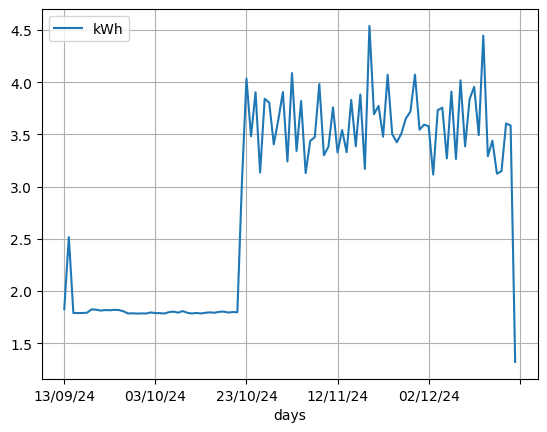

In [ ]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-12-21 00:00:04.533646	2024-12-21 08:13:21.746646	8h 13m 17s 	1000
2024-12-21 08:13:21.746646	2024-12-21 10:39:58.031646	2h 26m 36s 	321
<class 'pandas.core.frame.DataFrame'>
Index: 1321 entries, 1705202 to 1706522
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1321 non-null   int64         
 1   kWh        1321 non-null   float64       
 2   sec        1321 non-null   float64       
 3   Wh         1321 non-null   float64       
 4   cumul(ms)  1321 non-null   int64         
 5   dates      1321 non-null   datetime64[ns]
 6   days       1321 non-null   object        
 7   heure      1321 non-null   object        
 8   hours      1321 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 103.2+ KB


('21/12/24', <Axes: xlabel='hours'>)

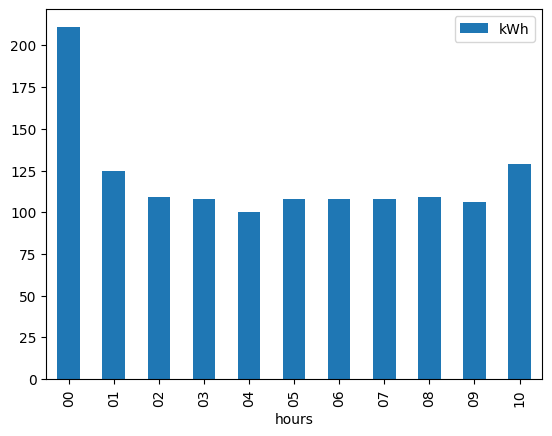

In [ ]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [42]:
df_grp

,kWh
days,
21/08/23,0.714
22/08/23,3.701
23/08/23,4.235
24/08/23,3.684
25/08/23,4.125
...,...
17/12/24,3.124
18/12/24,3.149
19/12/24,3.605


In [43]:
# select number of days to display
span = 30
#df_grp.tail(span)


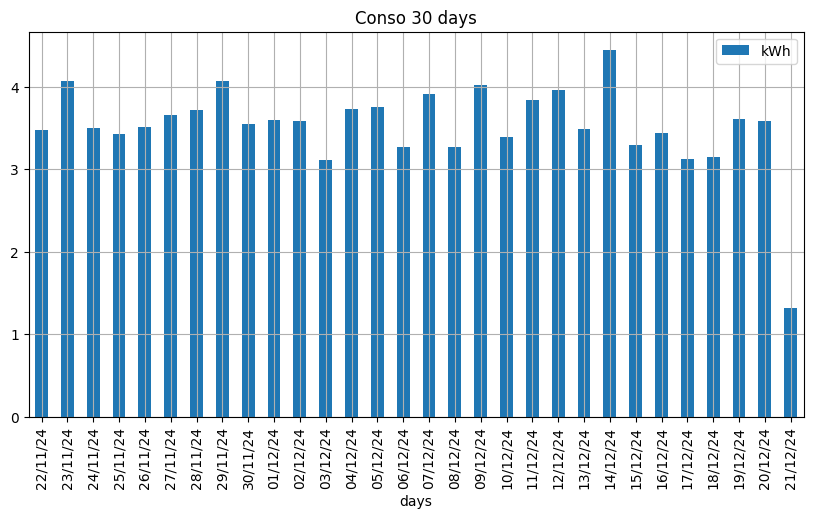

In [ ]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


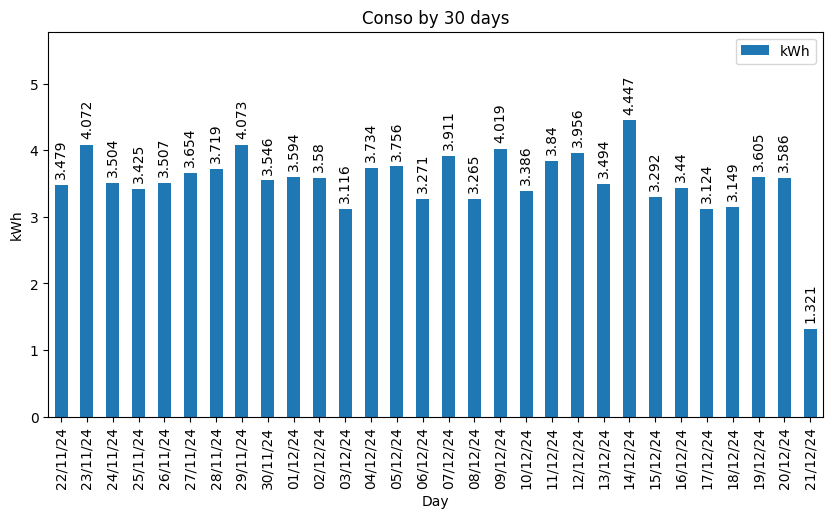

In [ ]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [46]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
22/11/24    3.479
23/11/24    4.072
24/11/24    3.504
25/11/24    3.425
26/11/24    3.507
27/11/24    3.654
28/11/24    3.719
29/11/24    4.073
30/11/24    3.546
01/12/24    3.594
02/12/24    3.580
03/12/24    3.116
04/12/24    3.734
05/12/24    3.756
06/12/24    3.271
07/12/24    3.911
08/12/24    3.265
09/12/24    4.019
10/12/24    3.386
11/12/24    3.840
12/12/24    3.956
13/12/24    3.494
14/12/24    4.447
15/12/24    3.292
16/12/24    3.440
17/12/24    3.124
18/12/24    3.149
19/12/24    3.605
20/12/24    3.586
21/12/24    1.321
Name: kWh, dtype: float64

In [47]:
x_labels=df_grp.tail(span).index
x_labels

Index(['22/11/24', '23/11/24', '24/11/24', '25/11/24', '26/11/24', '27/11/24',
       '28/11/24', '29/11/24', '30/11/24', '01/12/24', '02/12/24', '03/12/24',
       '04/12/24', '05/12/24', '06/12/24', '07/12/24', '08/12/24', '09/12/24',
       '10/12/24', '11/12/24', '12/12/24', '13/12/24', '14/12/24', '15/12/24',
       '16/12/24', '17/12/24', '18/12/24', '19/12/24', '20/12/24', '21/12/24'],
      dtype='object', name='days')

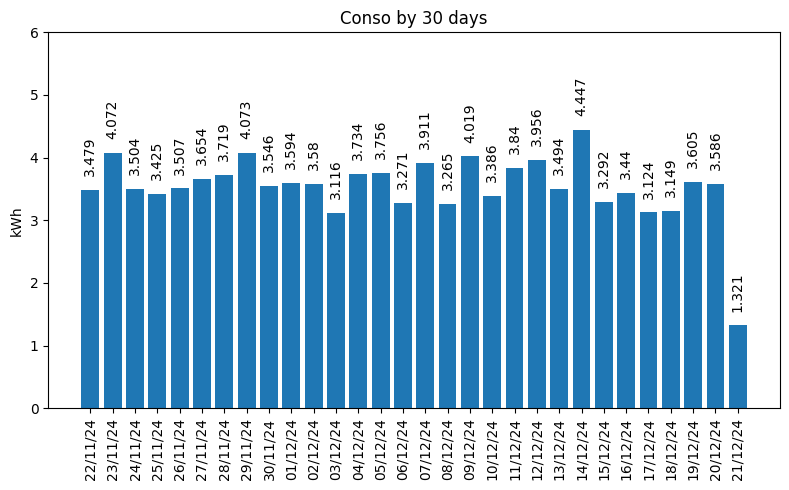

In [ ]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [49]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

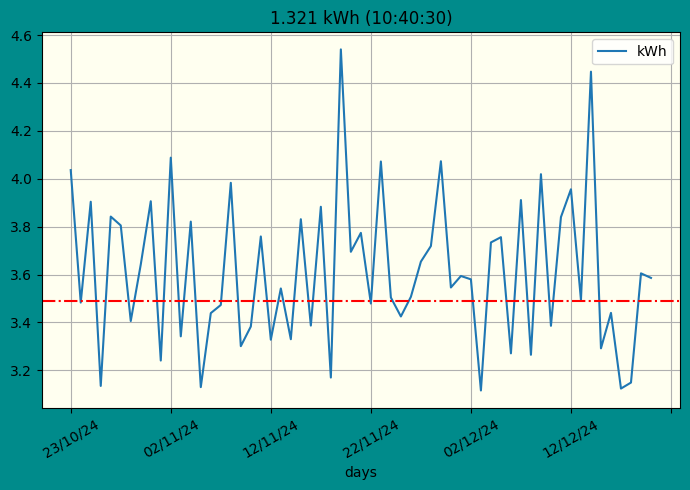

In [ ]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

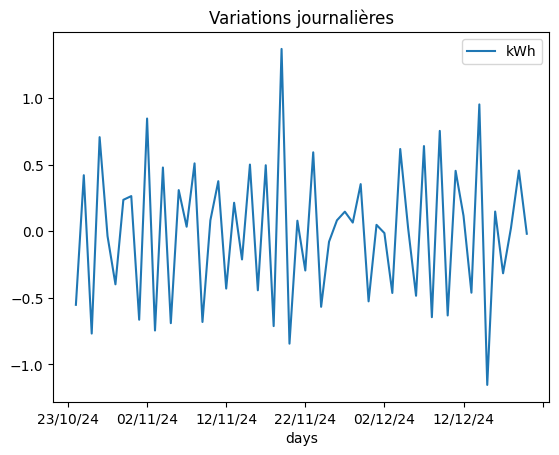

In [ ]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [ ]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:00:43.492646,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:01:05.350646,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:01:27.351646,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:01:49.279646,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:02:11.170646,21/08/23,20
...,...,...,...,...,...,...,...,...
1706518,29699,0.12,29.699,121.216203,42129467639,2024-12-21 10:38:09.197646,21/12/24,10
1706519,27431,0.13,27.431,131.238380,42129495070,2024-12-21 10:38:36.628646,21/12/24,10
1706520,26846,0.13,26.846,134.098190,42129521916,2024-12-21 10:39:03.474646,21/12/24,10
1706521,27206,0.13,27.206,132.323752,42129549122,2024-12-21 10:39:30.680646,21/12/24,10


In [ ]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [ ]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [55]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [ ]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,714
22/08/23,3701
23/08/23,4235
24/08/23,3684
25/08/23,4125
...,...
17/12/24,3124
18/12/24,3149
19/12/24,3605


In [58]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 20:00:43.492646,21/08/23,20
1,21858,0.16,21.858,164.699424,43792,2023-08-21 20:01:05.350646,21/08/23,20
2,22001,0.16,22.001,163.628926,65793,2023-08-21 20:01:27.351646,21/08/23,20
3,21928,0.16,21.928,164.173659,87721,2023-08-21 20:01:49.279646,21/08/23,20
4,21891,0.16,21.891,164.451144,109612,2023-08-21 20:02:11.170646,21/08/23,20
...,...,...,...,...,...,...,...,...
1706518,29699,0.12,29.699,121.216203,42129467639,2024-12-21 10:38:09.197646,21/12/24,10
1706519,27431,0.13,27.431,131.238380,42129495070,2024-12-21 10:38:36.628646,21/12/24,10
1706520,26846,0.13,26.846,134.098190,42129521916,2024-12-21 10:39:03.474646,21/12/24,10
1706521,27206,0.13,27.206,132.323752,42129549122,2024-12-21 10:39:30.680646,21/12/24,10


In [ ]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 20    0        21/08/23    20  0.16
               1        21/08/23    20  0.16
               2        21/08/23    20  0.16
               3        21/08/23    20  0.16
               4        21/08/23    20  0.16
...                          ...   ...   ...
21/12/24 10    1706518  21/12/24    10  0.12
               1706519  21/12/24    10  0.13
               1706520  21/12/24    10  0.13
               1706521  21/12/24    10  0.13
               1706522  21/12/24    10  0.13

[1706523 rows x 3 columns]

In [ ]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [ ]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('22/08/23', '18'), ('22/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/23', '13'), ('23/08/23', '14'), ('23/08/23', '15'), ('23/08/23', '16'), ('23/08/2

In [ ]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,714,714
22/08/23,3701,3701
23/08/23,4235,4235
24/08/23,3684,3684
25/08/23,4125,4125
...,...,...
17/12/24,3124,3124
18/12/24,3149,3149
19/12/24,3605,3605


In [63]:
grp_by_day['kWh'].cumsum()

days
21/08/23        714
22/08/23       4415
23/08/23       8650
24/08/23      12334
25/08/23      16459
             ...   
17/12/24    1694862
18/12/24    1698011
19/12/24    1701616
20/12/24    1705202
21/12/24    1706523
Name: kWh, Length: 489, dtype: int64

In [ ]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 20     172
         21     282
         22     130
         23     130
22/08/23 00     130
...             ...
21/12/24 06     108
         07     108
         08     109
         09     106
         10     129

[11703 rows x 1 columns]

In [65]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  20           172
          21           454
          22           584
          23           714
22/08/23  00           844
                    ...   
21/12/24  06       1706071
          07       1706179
          08       1706288
          09       1706394
          10       1706523
Name: kWh, Length: 11703, dtype: int64

In [ ]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 20     172     172    NaN
         21     282     454  110.0
         22     130     584 -152.0
         23     130     714    0.0
22/08/23 00     130     130    NaN
...             ...     ...    ...
21/12/24 06     108     869    0.0
         07     108     977    0.0
         08     109    1086    1.0
         09     106    1192   -3.0
         10     129    1321   23.0

[11703 rows x 3 columns]

In [67]:
today, grp_by_dayhours.loc[today]

('21/12/24',
        kWh  cumsum  diff
 hours                   
 00     211     211   NaN
 01     125     336 -86.0
 02     109     445 -16.0
 03     108     553  -1.0
 04     100     653  -8.0
 05     108     761   8.0
 06     108     869   0.0
 07     108     977   0.0
 08     109    1086   1.0
 09     106    1192  -3.0
 10     129    1321  23.0)

Text(0.5, 1.0, 'Cumul journalier')

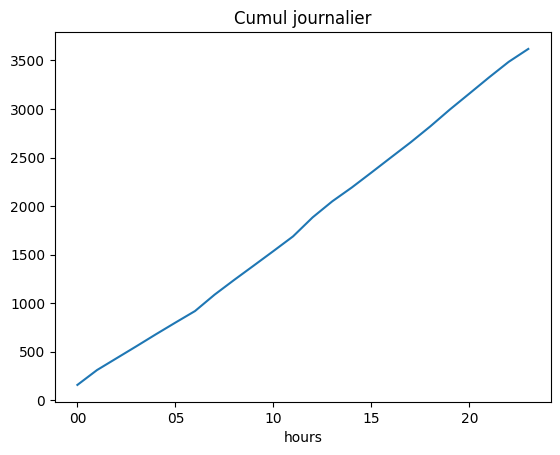

In [68]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

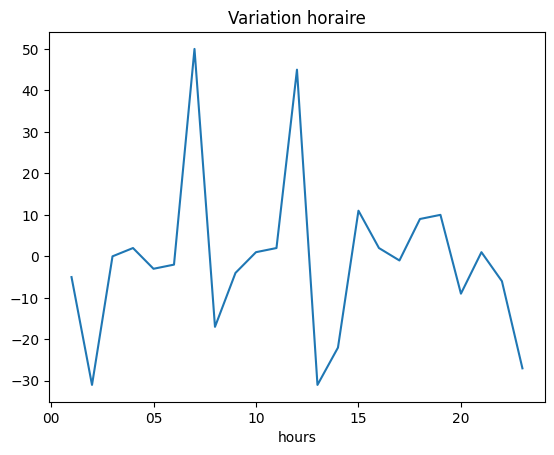

In [ ]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [70]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

489

In [71]:
df_grp.tail(n)['kWh'].describe()


count    489.000000
mean       3.489822
std        0.693589
min        0.714000
25%        3.339000
50%        3.628000
75%        3.871000
max        5.106000
Name: kWh, dtype: float64

In [72]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '489 days')

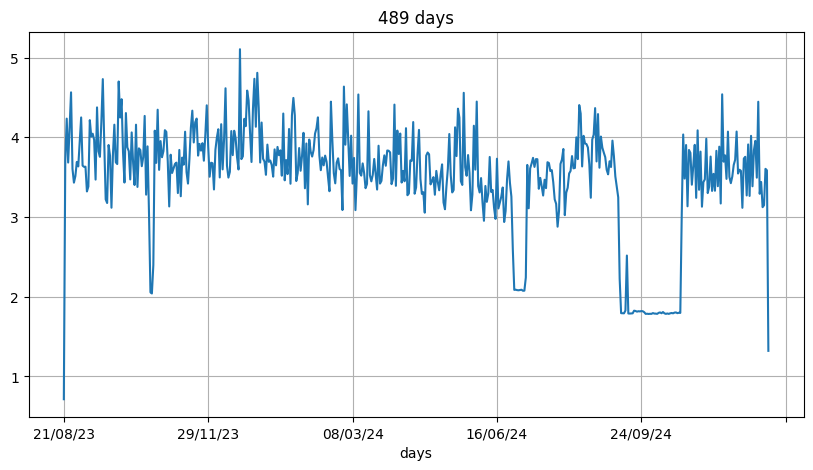

In [ ]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

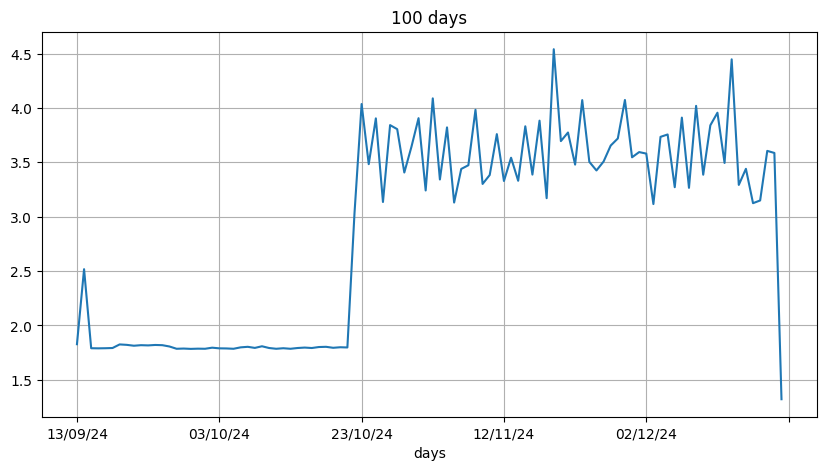

In [ ]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [75]:
df_grp['kWh']

days
21/08/23    0.714
22/08/23    3.701
23/08/23    4.235
24/08/23    3.684
25/08/23    4.125
            ...  
17/12/24    3.124
18/12/24    3.149
19/12/24    3.605
20/12/24    3.586
21/12/24    1.321
Name: kWh, Length: 489, dtype: float64

In [ ]:
df_grp.describe()

,kWh
count,489.000000
mean,3.489822
std,0.693589
min,0.714000
25%,3.339000
50%,3.628000
75%,3.871000
max,5.106000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

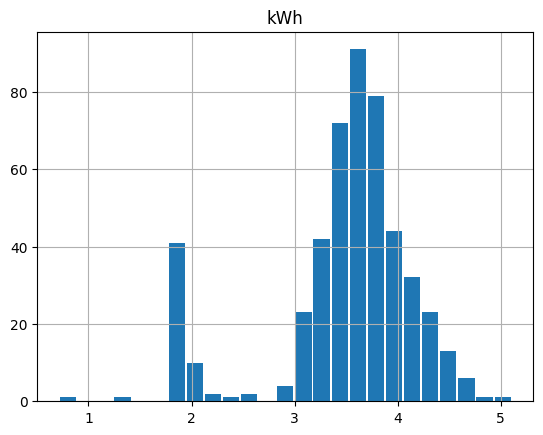

In [77]:
# répartition des consos de 1 à 5 kWh par jour
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'
df_grp.hist(bins=25, density=False, histtype='bar',rwidth=0.9, align='mid')

In [78]:
df_grp.tail(span)['kWh']

days
13/09/24    1.827
14/09/24    2.517
15/09/24    1.790
16/09/24    1.789
17/09/24    1.790
            ...  
17/12/24    3.124
18/12/24    3.149
19/12/24    3.605
20/12/24    3.586
21/12/24    1.321
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [ ]:
day

'21/12/24'

In [ ]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,211,211,NaN
01,125,336,-86.0
02,109,445,-16.0
03,108,553,-1.0
04,100,653,-8.0
05,108,761,8.0
06,108,869,0.0
07,108,977,0.0
08,109,1086,1.0


In [81]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


11

In [82]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 12)

In [83]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [84]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [86]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [ ]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 00 to 10
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     11 non-null     int64  
 1   cumsum  11 non-null     int64  
 2   diff    10 non-null     float64
 3   days    11 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 440.0+ bytes


In [ ]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
Name: days, dtype: float64

In [ ]:
day

'21/12/24'

In [ ]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,211,211,NaN,1.0
01,125,336,-86.0,2.0
02,109,445,-16.0,3.0
03,108,553,-1.0,4.0
04,100,653,-8.0,5.0
05,108,761,8.0,6.0
06,108,869,0.0,7.0
07,108,977,0.0,8.0
08,109,1086,1.0,9.0


Text(0.5, 1.0, '21/12/24')

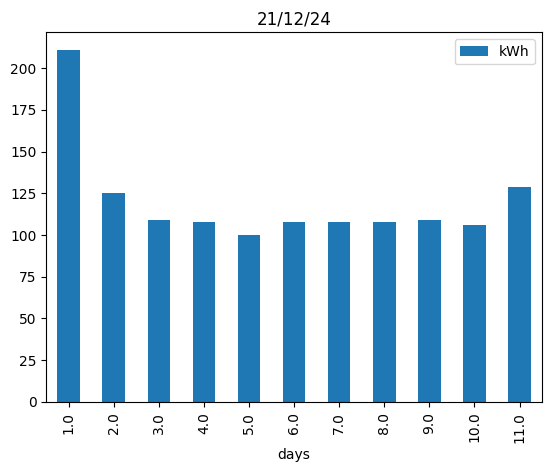

In [ ]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [92]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'], dtype='object', name='hours')

# Conso du jour


In [ ]:
groupedbyhour.count()

,kWh
hours,
00,211
01,125
02,109
03,108
04,100
05,108
06,108
07,108
08,109


In [ ]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    150
01    167
02    153
03    167
04    166
05    146
06    134
07    123
08    122
09    130
10    115
11    130
12    130
13    172
14    157
15    141
16    244
17    895
18    238
19    300
20    285
21    319
22    326
23    196
Name: kWh, dtype: int64

In [95]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

288.35

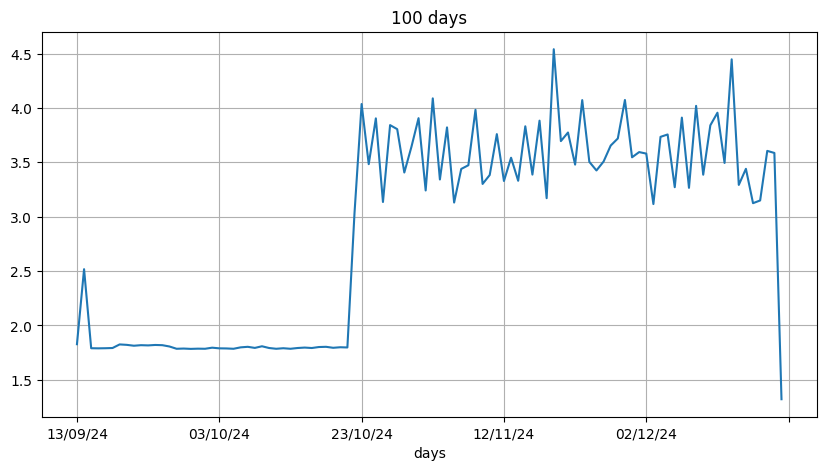

In [ ]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

In [97]:
df_grp.tail(1)

,kWh
days,
21/12/24,1.321


In [98]:
span = 1
#df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
#plt.title(f'{span} days')
sum(df_grp.tail(span)['kWh'])

1.321

In [ ]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

109.39010548591614


# Today

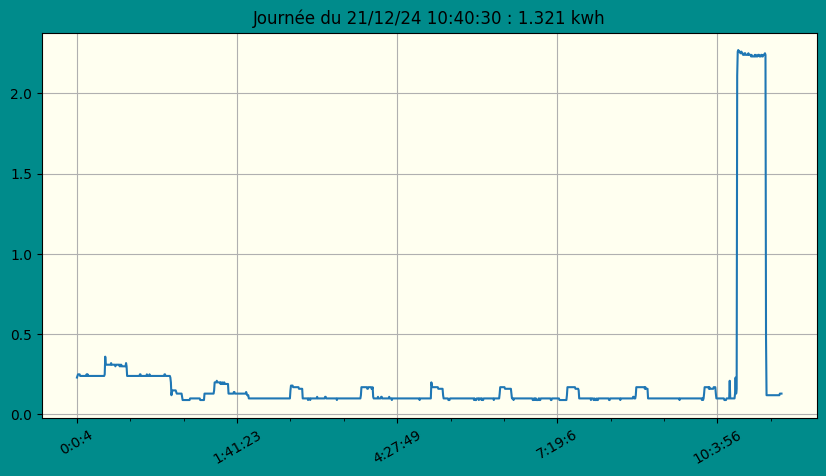

In [ ]:
show(today,bgcolor='ivory')

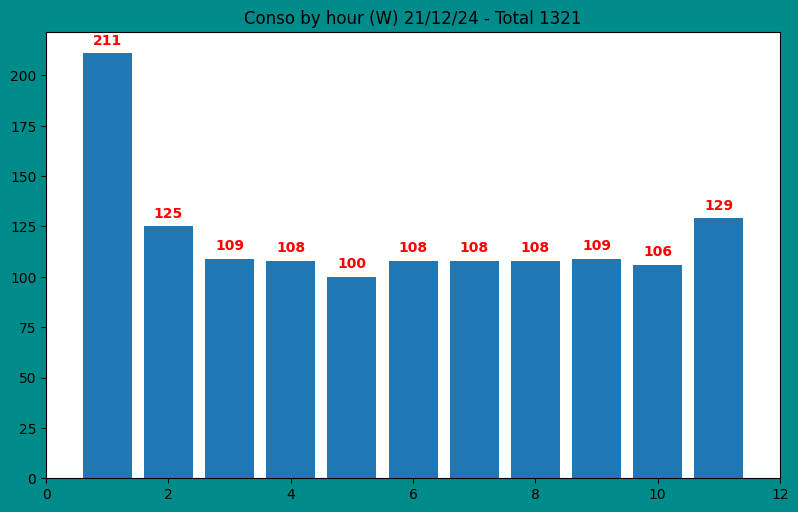

In [ ]:
conso_by_hour(today)

In [102]:
day = '17/12/24'

('17/12/24', None)

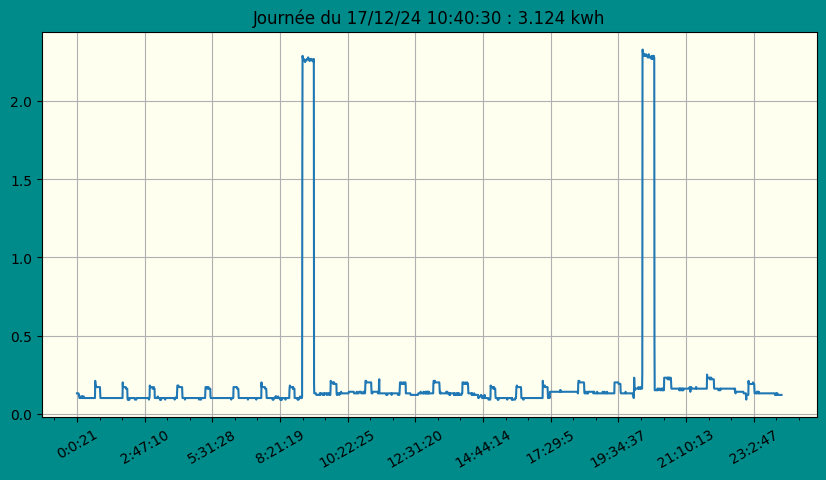

In [ ]:
day, show(day,bgcolor='ivory')

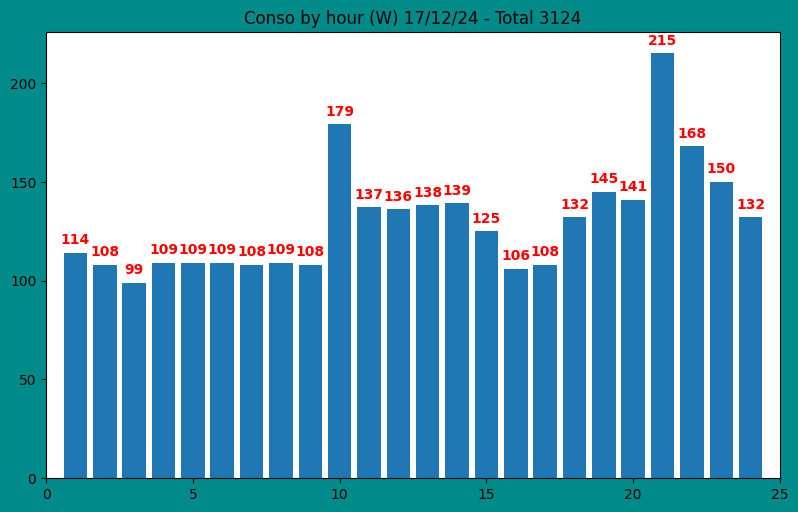

In [ ]:
conso_by_hour(day)

('21/12/23', None)

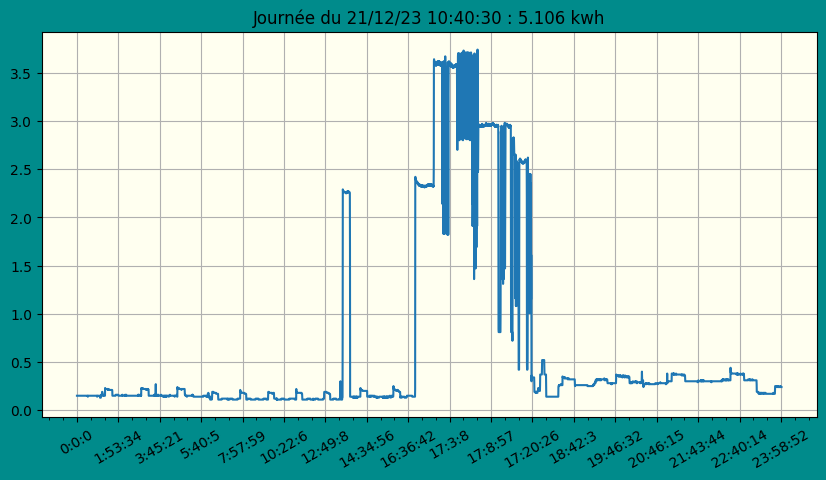

In [ ]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

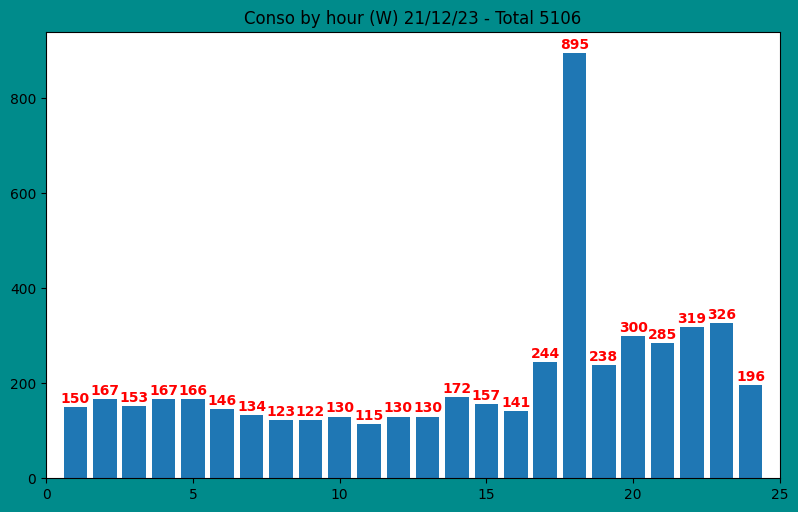

In [ ]:
conso_by_hour(day)

In [107]:
sum(data)

5106

In [108]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,211,211,NaN,1.0
01,125,336,-86.0,2.0
02,109,445,-16.0,3.0
03,108,553,-1.0,4.0
04,100,653,-8.0,5.0
05,108,761,8.0,6.0
06,108,869,0.0,7.0
07,108,977,0.0,8.0
08,109,1086,1.0,9.0


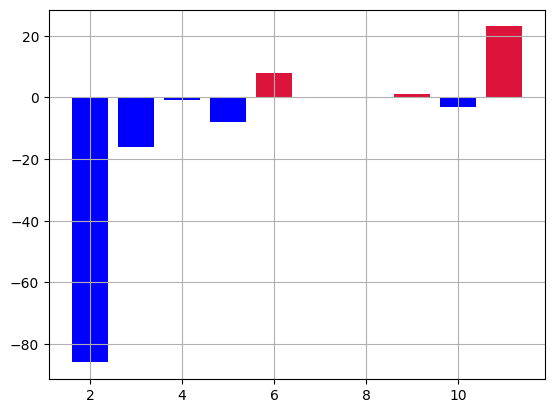

In [ ]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [110]:
data

hours
00    150
01    167
02    153
03    167
04    166
05    146
06    134
07    123
08    122
09    130
10    115
11    130
12    130
13    172
14    157
15    141
16    244
17    895
18    238
19    300
20    285
21    319
22    326
23    196
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

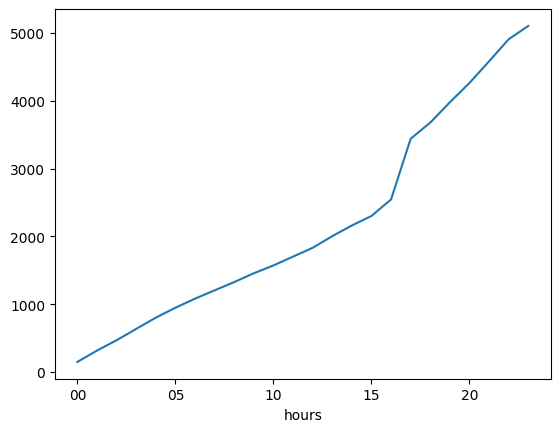

In [ ]:
data.cumsum().plot()


<Axes: xlabel='hours'>

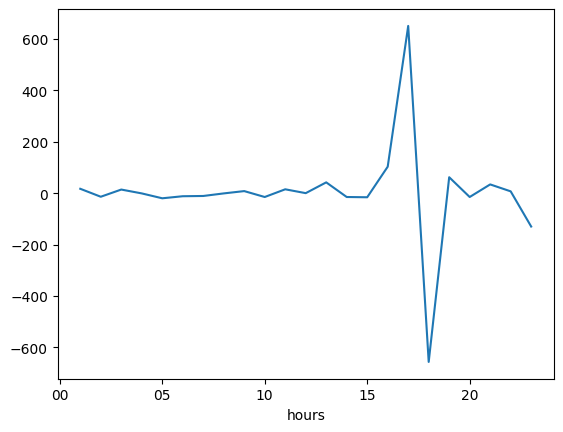

In [ ]:
# evolution par heure
data.diff().plot()

In [113]:
data.diff().describe()

count     23.000000
mean       2.000000
std      201.387009
min     -657.000000
25%      -15.000000
50%       -1.000000
75%       16.000000
max      651.000000
Name: kWh, dtype: float64

<Axes: >

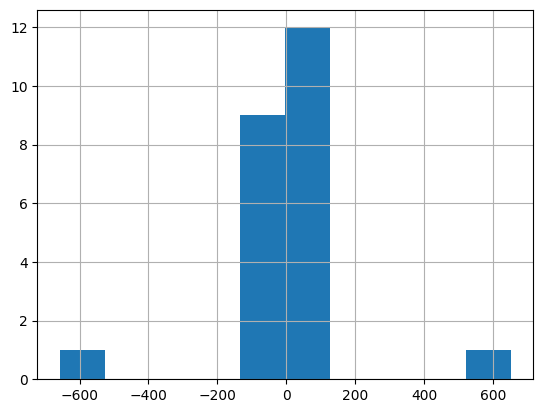

In [ ]:
data.diff().hist()

# Test sauvegarde

In [115]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'average_binding_energy_by_nucleons.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',


In [116]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [117]:
#conso_byhour(day)

In [118]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


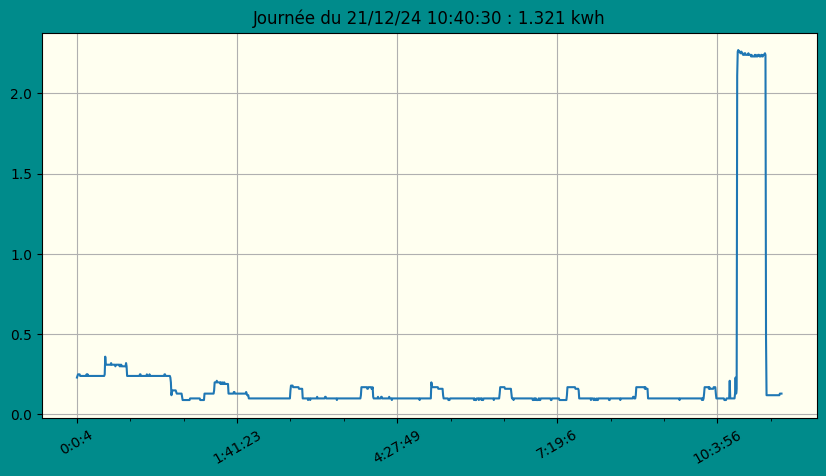

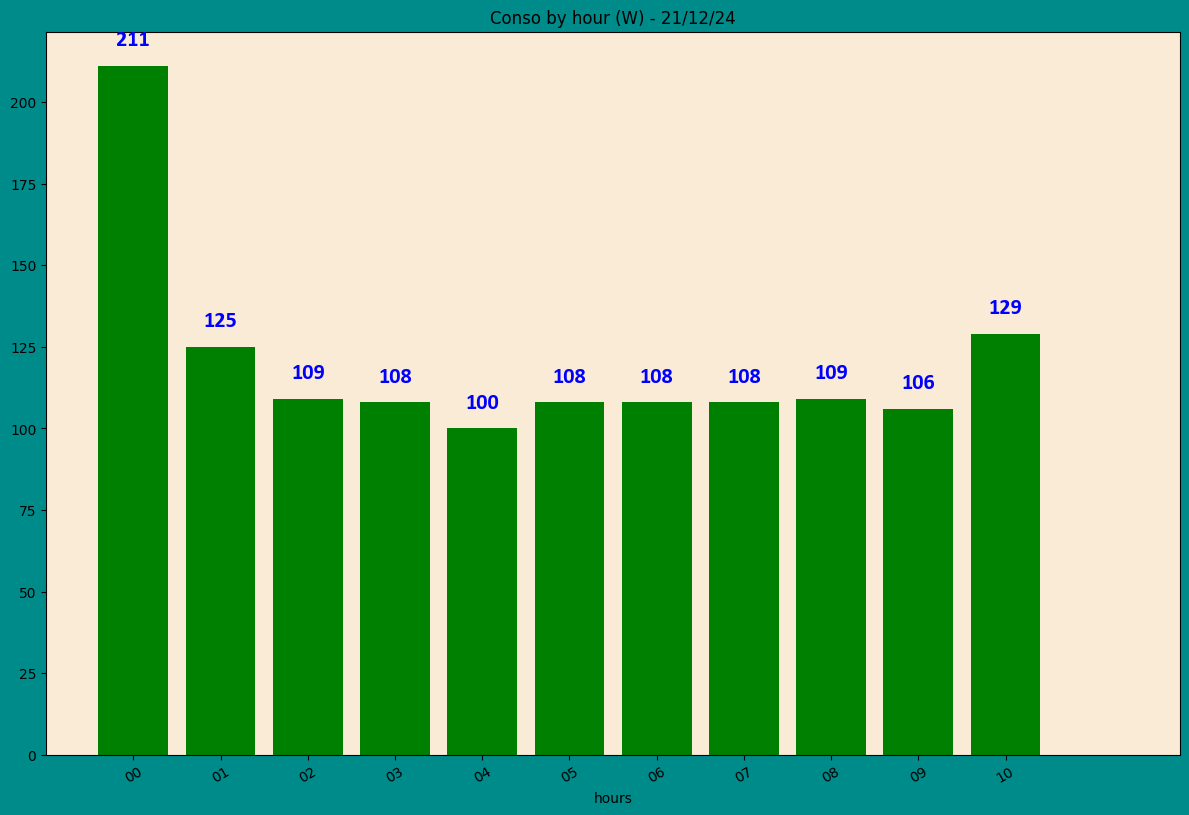

In [ ]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [120]:
month.describe()


count    30.000000
mean      3.610600
std       0.312703
min       3.116000
25%       3.428750
50%       3.583000
75%       3.769500
max       4.447000
Name: kWh, dtype: float64

<Axes: >

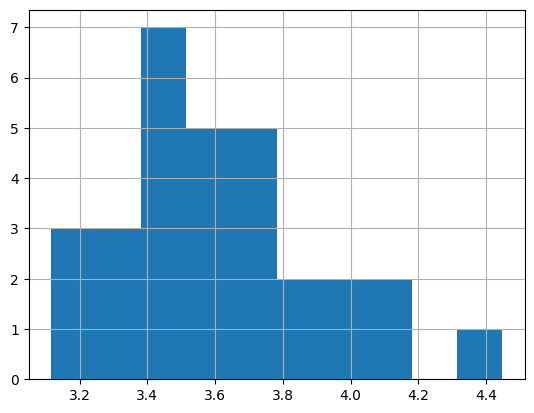

In [121]:
month.hist()

<Axes: xlabel='days'>

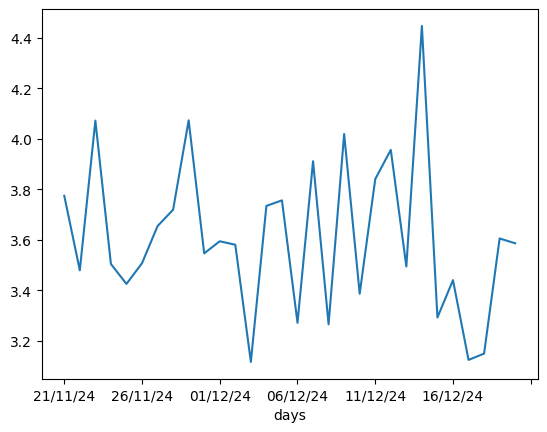

In [ ]:
month.plot()

In [123]:
# date with max conso in 1 month
month.idxmax()

'14/12/24'

In [124]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'14/12/24'

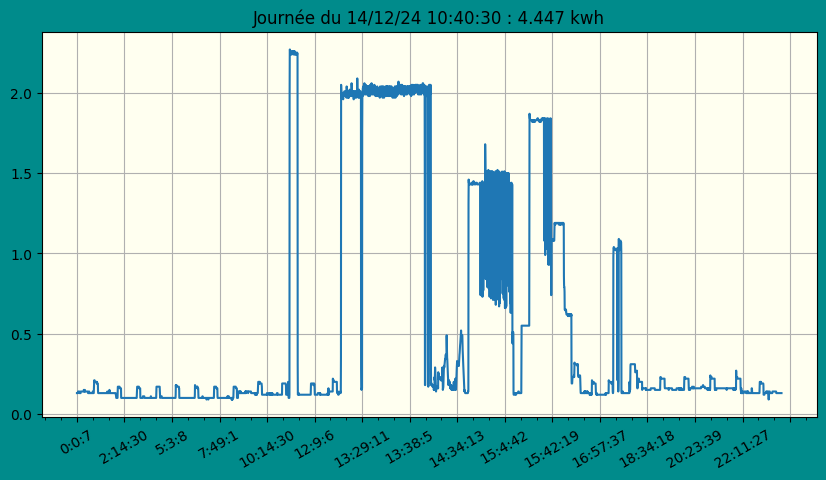

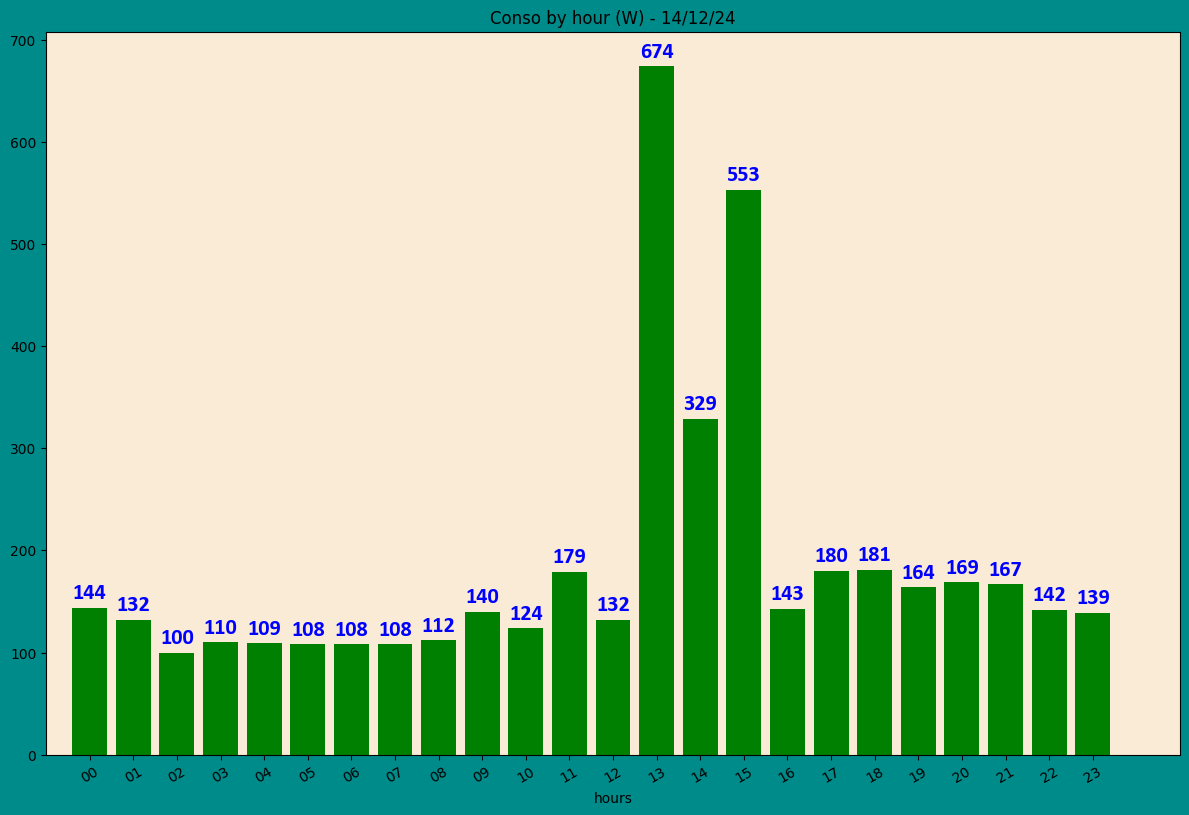

In [ ]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [126]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 20     172     172    NaN   NaN
         21     282     454  110.0   NaN
         22     130     584 -152.0   NaN
         23     130     714    0.0   NaN
22/08/23 00     130     130    NaN   NaN
...             ...     ...    ...   ...
21/12/24 06     108     869    0.0   7.0
         07     108     977    0.0   8.0
         08     109    1086    1.0   9.0
         09     106    1192   -3.0  10.0
         10     129    1321   23.0  11.0

[11703 rows x 4 columns]

In [127]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,144,144,NaN,NaN
01,132,276,-12.0,NaN
02,100,376,-32.0,NaN
03,110,486,10.0,NaN
04,109,595,-1.0,NaN
05,108,703,-1.0,NaN
06,108,811,0.0,NaN
07,108,919,0.0,NaN
08,112,1031,4.0,NaN


In [128]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

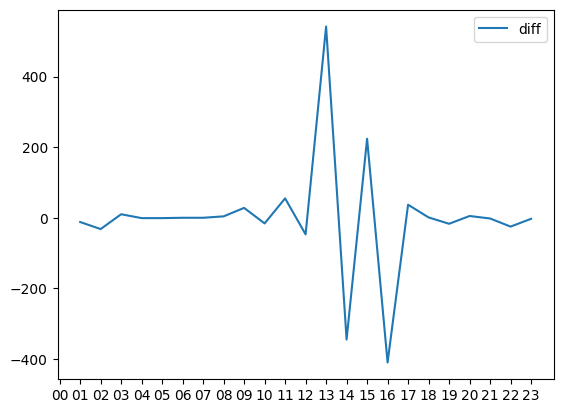

In [129]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

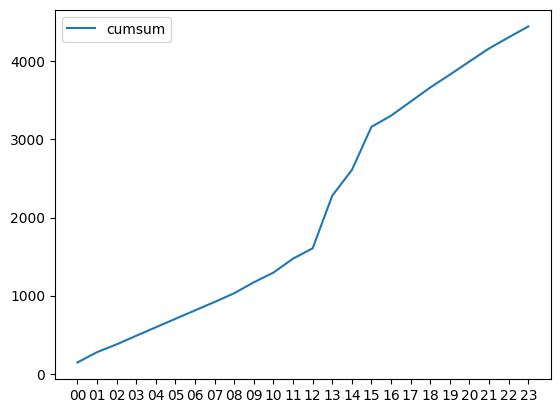

In [ ]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [131]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB